#**Name -** Harshal Prakash Margaj

# **Task 2 -** Stock Market Prediction And Forecasting Using Stacked LSTM

##**Dataset -** https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

##**Level -** <font color = blue>Beginner Level Task<font/>

# **Importing the libraries**

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
# to create the stacked LSTM model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

# **Data Collection**
<font color = blue>Import data from link, of stock market<font/>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head() #used to get the first 5 rows

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail() #use to get the last 5 rows

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df.describe() #returns description of the data in the DataFrame

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<font color = blue>So we are working on open price of day in stock exchange<font/>

In [5]:
# By this we will get all open values and df1
df1= df.reset_index()['Open'] 
print(df1)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


Text(0.5, 1.0, 'Open')

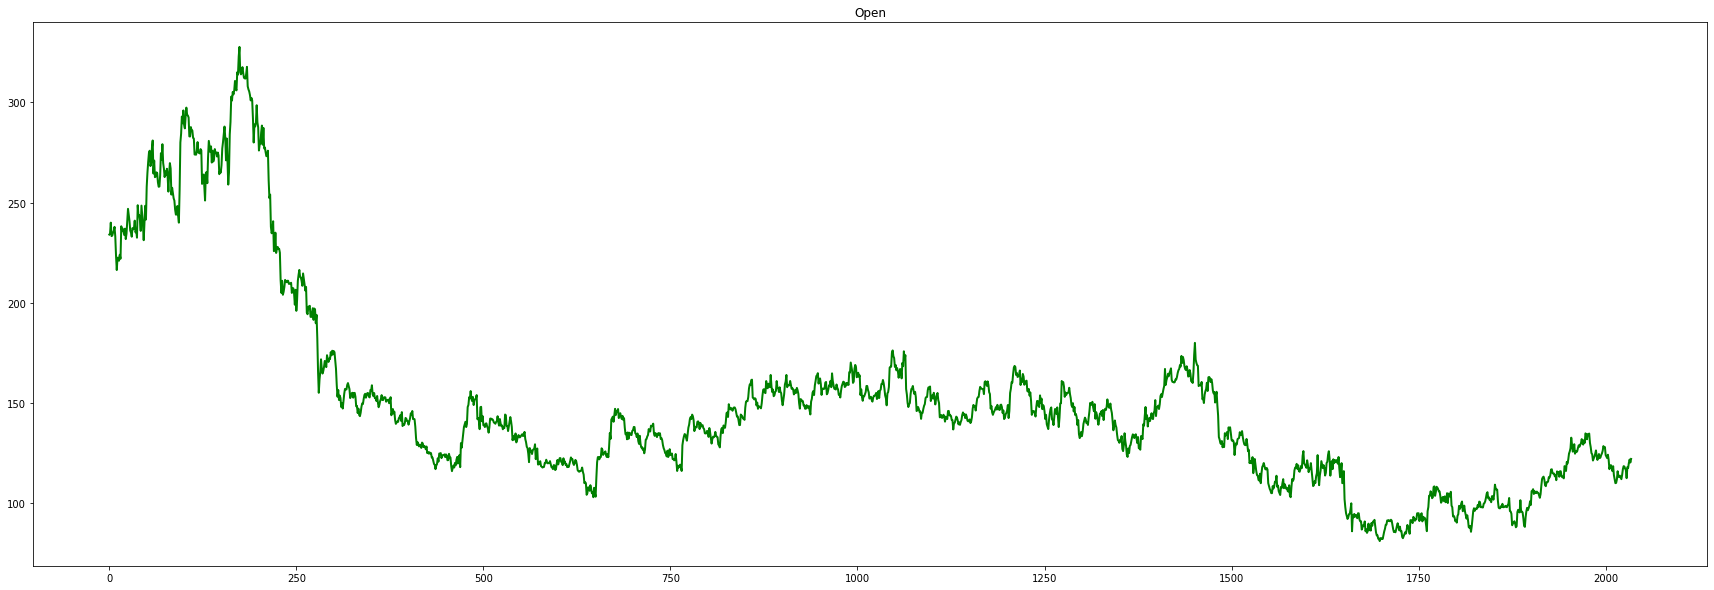

In [6]:
# Plotting df1
plt.subplots(figsize = (30,10))
plt.plot(df1 , color ="green", linewidth=2)
plt.title("Open")

<font color = blue>**LSTM** are sensitive to the scale of the data. so we apply **MinMax scaler**<font/>

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1.shape #Returns tuple of shape (Rows, columns) of dataframe/series

(2035, 1)

<font color = blue>**df1** is now converted into array<font/>

In [9]:
print(df1)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


# **Preprocessing the data**

###<font color = blue>Splitting dataset into train and test split<font/>

In [10]:
# 75% of total length of my dataframe should be the training size
training_size = int( len(df1) * 0.75)
# 25% my testing size
testing_size  = len(df1) - training_size
train_data , test_data = df1[0 : training_size, :], df1[training_size : len(df1), :1]
training_size , testing_size

(1526, 509)

In [11]:
train_data , test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]), array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.0971208

### <font color = blue>Convert an array of values into a dataset matrix<font/>

In [12]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

In [13]:
# reshape inot X = t, t + 1, t + 2, t + 3 and Y = t + 4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [14]:
print(x_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [15]:
print(x_test.shape), print(y_test.shape)

(408, 100)
(408,)


(None, None)

# **Stacked LSTM Model**

### <font color = blue>reshape input to be [samples, time steps, features] which is required for LSTM<font/>

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [17]:
# Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [18]:
model.summary() # summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 51s 1s/step - loss: 0.0337 - val_loss: 0.0053
Epoch 2/100
23/23 [==============================] - 30s 1s/step - loss: 0.0043 - val_loss: 0.0028
Epoch 3/100
23/23 [==============================] - 33s 1s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/100
23/23 [==============================] - 29s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/100
23/23 [==============================] - 30s 1s/step - loss: 0.0014 - val_loss: 0.0016
Epoch 6/100
23/23 [==============================] - 29s 1s/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/100
23/23 [==============================] - 30s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 29s 1s/step - loss: 0.0012 - val_loss: 0.0015
Epoch 9/100
23/23 [==============================] - 29s 1s/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 30s 1s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 11/

# **Predict the test data and plot the output**

In [20]:
#Lets predict and check performance metrics

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [21]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
# Calculating RMSE performance metrics
print('RMSE performance matrics : ',math.sqrt(mean_squared_error(y_train, train_predict)) )

RMSE performance matrics :  163.87985599737843


In [22]:
# Calculating the RMSE of Test data
print("RMSE of Test data: ",math.sqrt(mean_squared_error(y_test , test_predict)) )

RMSE of Test data:  107.3509915677862


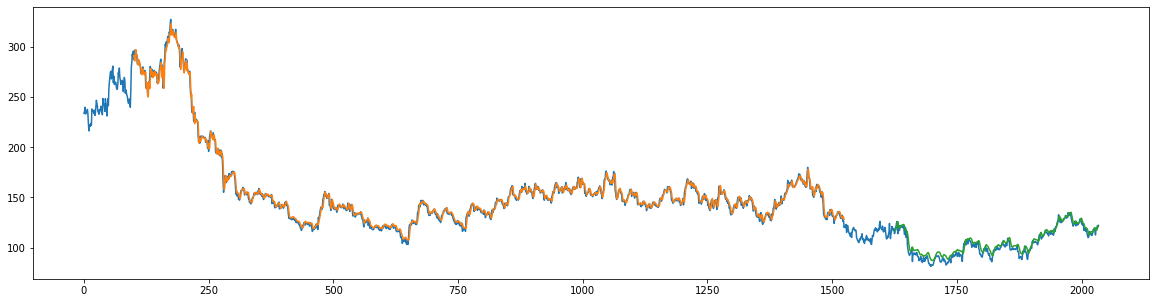

In [23]:
# Plotting 

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.subplots(figsize = (20,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **Predict the future 30 days and plot the output**

In [24]:
print("Length of test data : ", len(test_data))

Length of test data :  509


In [25]:
test_data.shape

(509, 1)

<font color = blue>now taking previous 100 days data from test data prediction of future data i.e.<font/>

In [26]:
len(test_data) - 100

409

In [27]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [28]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [29]:
lst_output=[]
n_steps=100

future_Days= 30

i=0

while(i<future_Days):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("Day {} input {}".format(i,x_input)) 
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("Day {} output {}\n".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16966721]
101
Day 1 input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

In [30]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [31]:
len(df1)

2035

In [32]:
len(df1) - 100

1935

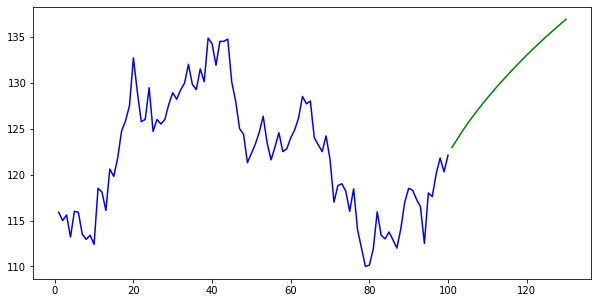

In [33]:
plt.subplots(figsize = (10,5))
plt.plot(day_new, scaler.inverse_transform(df1[1935:]), color = 'blue')
plt.plot(day_pred, scaler.inverse_transform(lst_output), color = 'green')

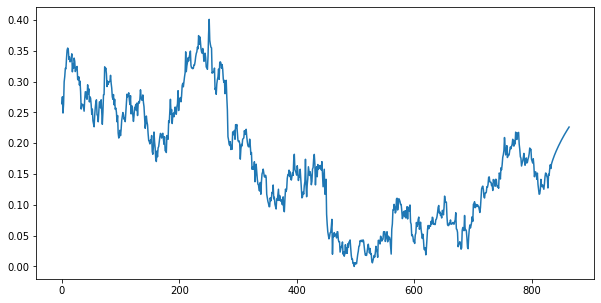

In [34]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.subplots(figsize = (10,5))
plt.plot(df2[1200:])

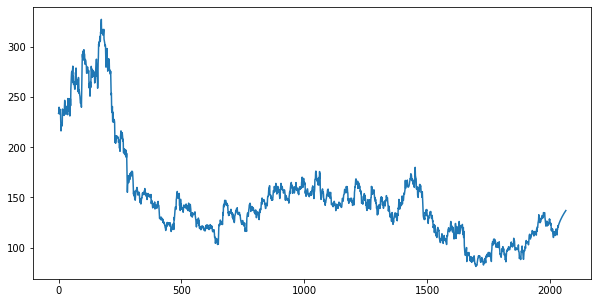

In [35]:
df2 = scaler.inverse_transform(df2).tolist()
plt.subplots(figsize = (10,5))
plt.plot(df2)